In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from compute_Final import compute_F
from scipy.optimize import minimize


In [35]:
f = np.loadtxt('terminal_feed_fraction_f.csv', delimiter=',', skiprows=1)
F = np.loadtxt('terminal_incorporated_fraction_F.csv', delimiter=',', skiprows=1)

In [36]:
# Train-test split
f_train, f_test, F_train, F_test \
    = train_test_split(f, F, test_size=0.1)
print('Split into {} train and {} test samples'.format(
    f_train.shape[0], f_test.shape[0]))

Split into 80 train and 9 test samples


In [37]:
def loss(K_flat, *args):
    f_batch, F_batch = args
    n = np.sqrt(K_flat.size).astype('int')
    K = K_flat.reshape(n, n)
    l = 0
    for f, F in zip(f_batch, F_batch):
        l += np.linalg.norm(F - compute_F(f, K))**2
    l += 100 * (K_flat[0] - 1.0)**2
    return l

In [38]:
n = 3

In [60]:
K_init = np.random.uniform(size=(n**2,))

In [61]:
bounds = [(1e-3, 10), ]*(n**2)
print('\nComputing K by L-BFGS-B...')
results = minimize(
    loss, K_init,
    method='L-BFGS-B',
    bounds=bounds, args=(f_train, F_train),
    options={'ftol': 1e-16, 'gtol': 1e-16})
print(results['message'])

K_final = results['x'].reshape(n, n)


Computing K by L-BFGS-B...
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


In [62]:
K_final

array([[0.99999999, 1.7122925 , 1.64238568],
       [0.30198293, 0.6426879 , 1.53959345],
       [0.78022648, 1.54546179, 0.06366615]])

In [63]:
loss(K_final.flatten(), f_test, F_test)

0.3707787733607662

In [64]:
F_pred_test = []

for f in f_test:
    F_pred_test.append(compute_F(f, K_final))

F_pred_test = np.asarray(F_pred_test)

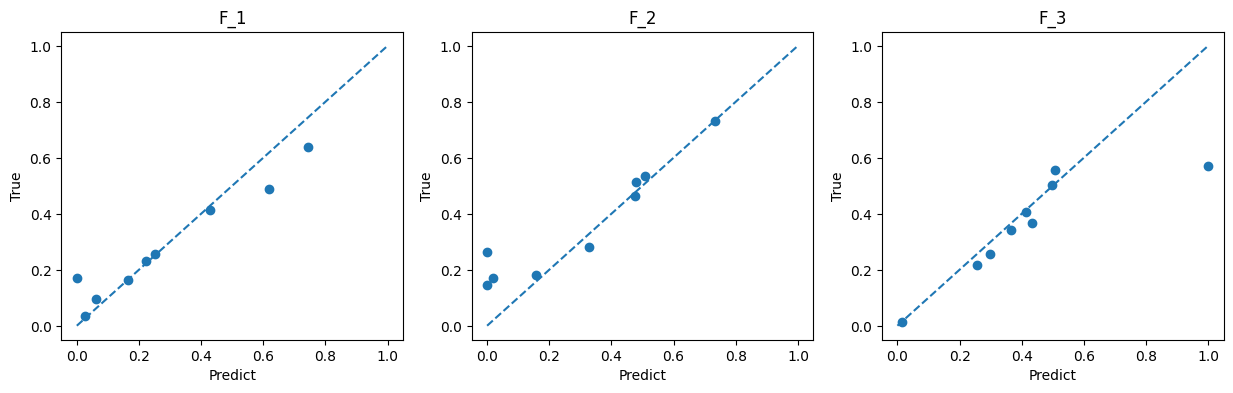

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i in range(n):
    ax[i].scatter(F_pred_test[:, i], F_test[:, i])
    ax[i].plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), '--')
    ax[i].set_xlabel('Predict')
    ax[i].set_ylabel('True')
    ax[i].set_title(f'F_{i+1}')